![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Basic Data Cleaning and EDA

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in the `files_for_lab` folder.

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is and _claim amounts_. You will help the senior management with some business questions that should help them to better understand their customers, improve their services and improve profitability.

**Some business Objectives for the case study could be**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions

1. Import the necessary libraries.
2. Load the `we_fn_use_c_marketing_customer_value_analysis.csv` into the variable `customer_df` (i.e. `customer_df = pd.readcsv("")`)
3. First, look at its main features (`head`, `shape`, `info`).
4. Rename the columns so they follow the PE8 (snake case).
5. Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. **Hint**: One thing you can try is to change date column to datetime format.
6. Plot a correlation matrix, and comment on what you observe.
7. Plot every continuous variable. Comment what you can see in the plots.
8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. 
You should also delete the column `customer_id` before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column `customer_id` required. **Hint**: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.
9. Look for outliers in the continuous variables. (**Hint**: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.
10. Check all columns for *NaN* values. Decide what (if anything) you will need to do with them.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [7]:
customer_df = pd.read_csv('https://raw.githubusercontent.com/ironhack-labs/lab-cleaning-numerical-data/master/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [12]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [14]:
customer_df.shape

(9134, 24)

In [15]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [18]:
customer_df.columns = customer_df.columns.str.lower()
customer_df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [22]:
def snake(x):
    return x.replace(' ','_')

In [26]:
customer_df = customer_df.rename(columns=lambda x: x.replace(' ', '_'))
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [32]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [33]:
customer_df.head(1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


In [37]:
customer_df['policy_type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [38]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


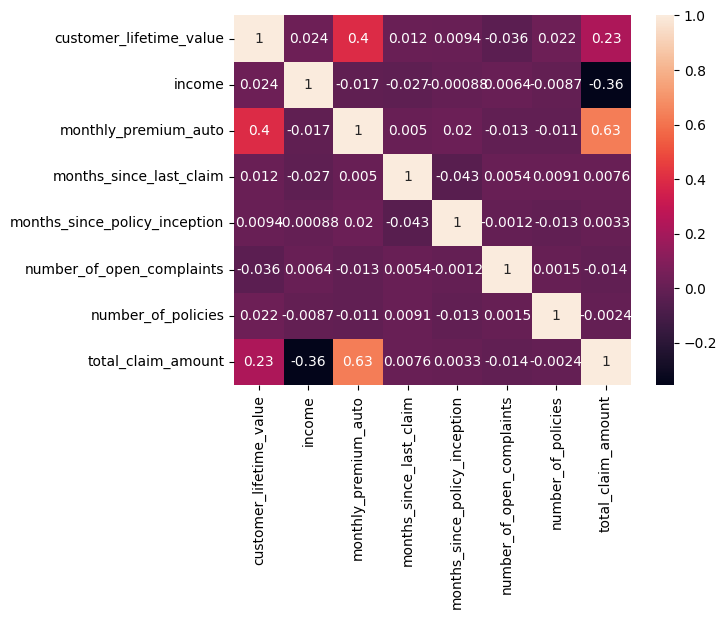

In [40]:
corr_matrix = customer_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Para un target de Total Claim Amount las variables numericas mas significativas son las de Customer lifetime value, income y monthly premium auto

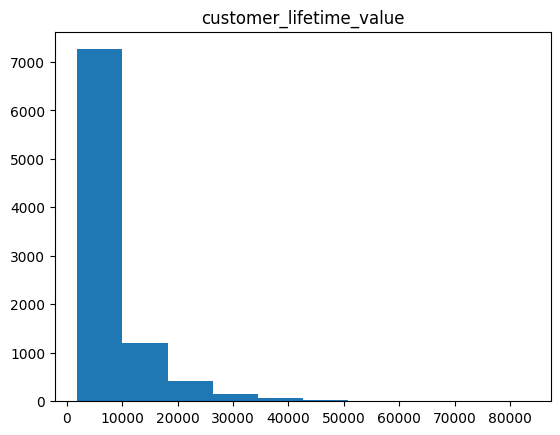

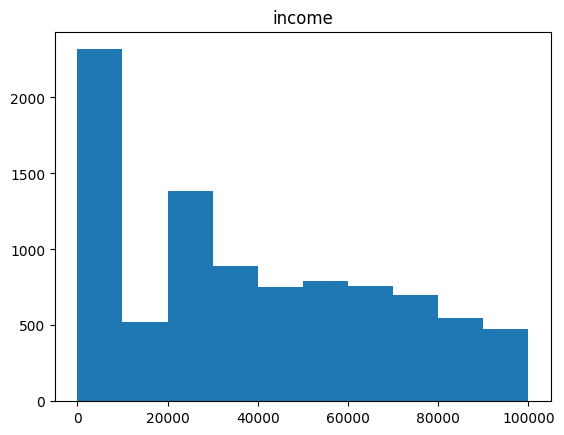

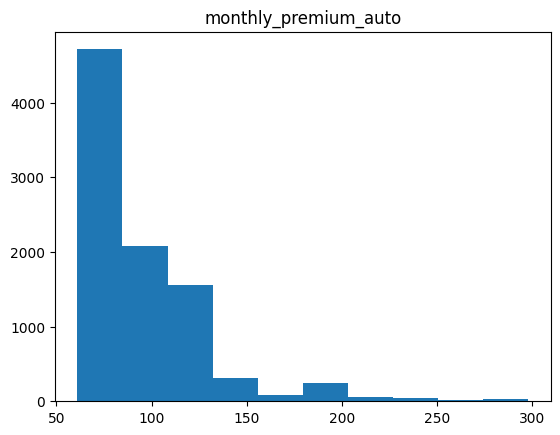

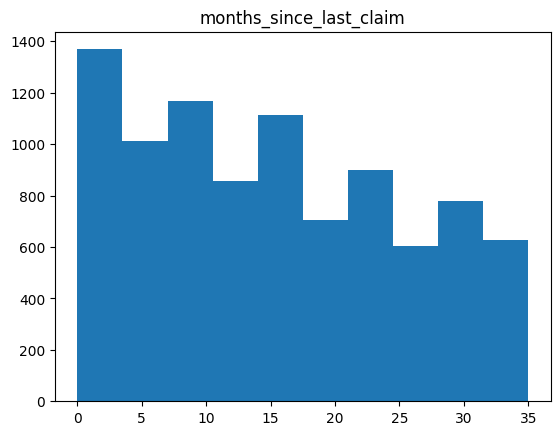

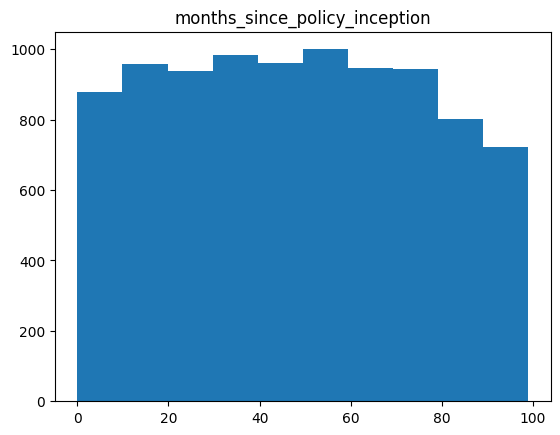

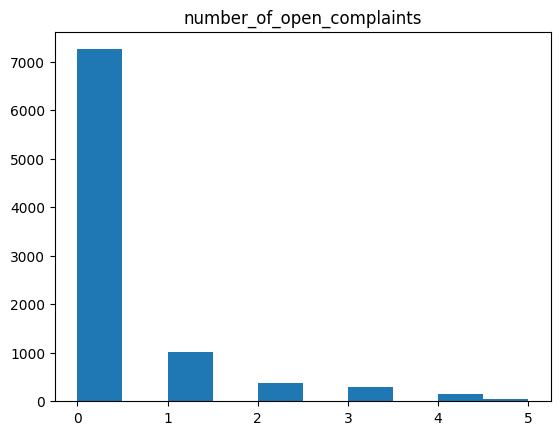

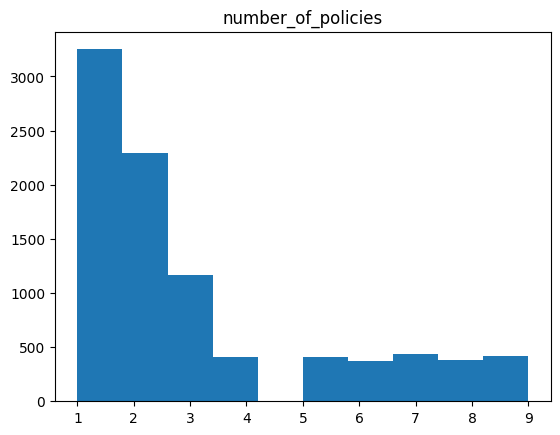

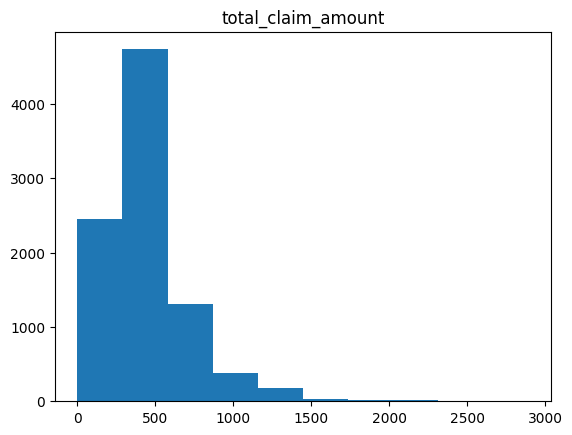

In [64]:
continuous = ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 
              'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']

for x in continuous:
    plt.hist(customer_df[x], bins=30)
    plt.title(x)
    plt.show()

In [72]:
categorical = customer_df.select_dtypes(include=['category','object'])#.columns.tolist()
categorical = categorical.drop("customer", axis=1)
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


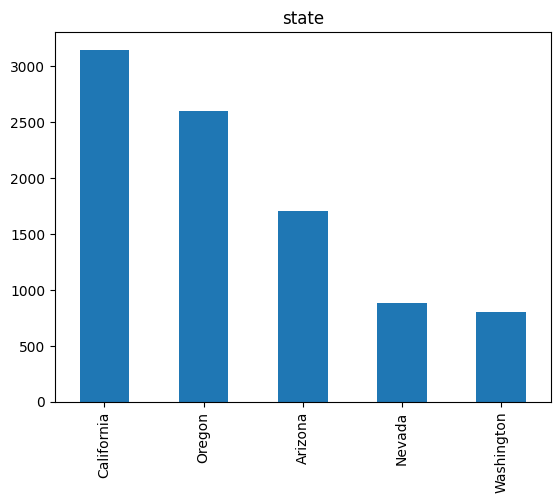

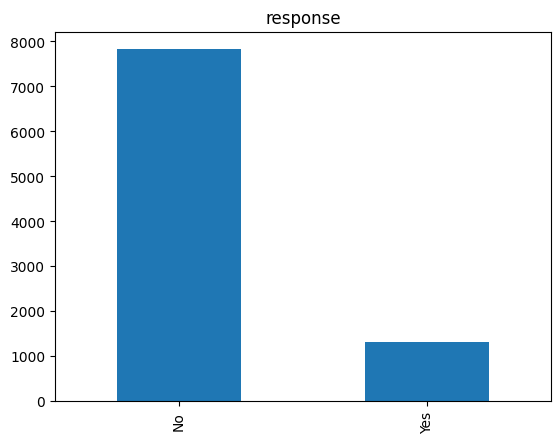

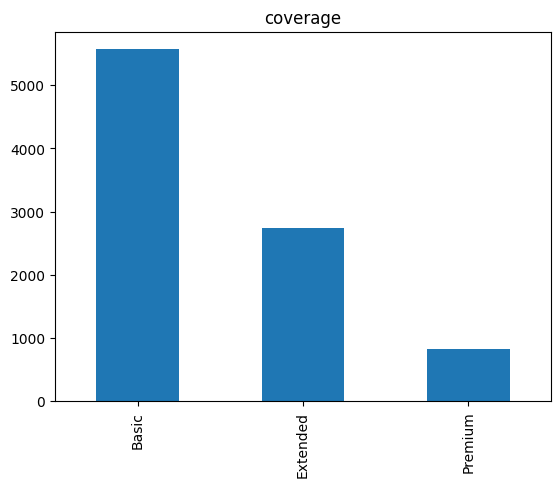

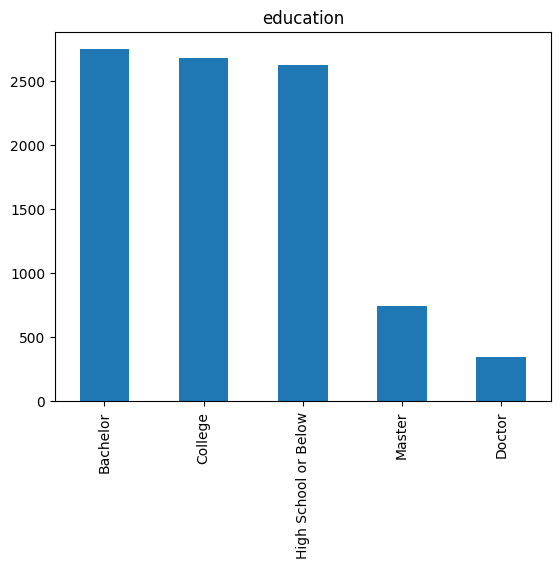

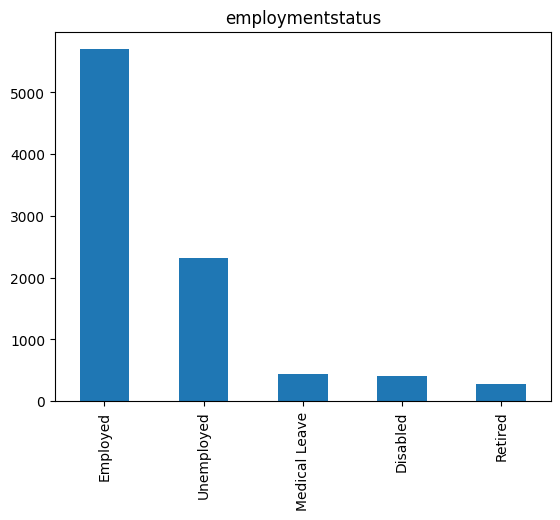

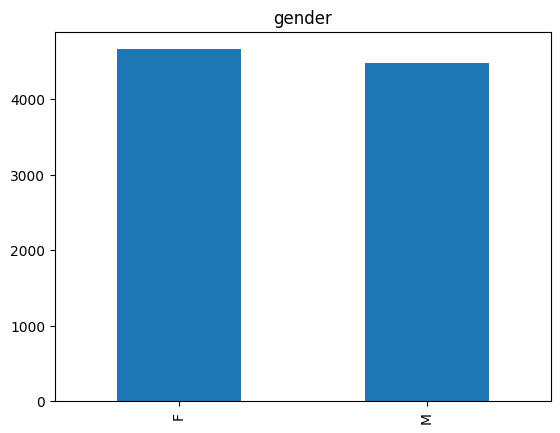

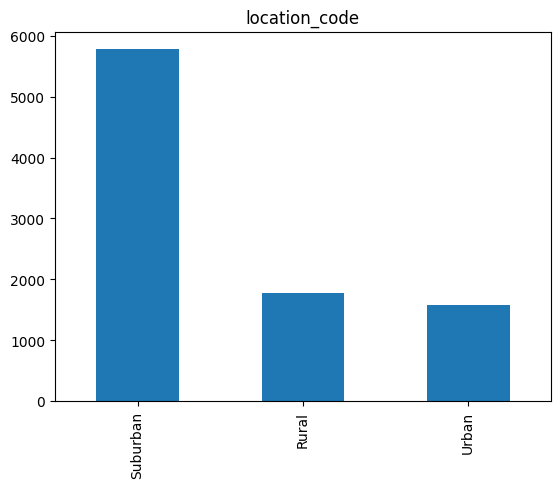

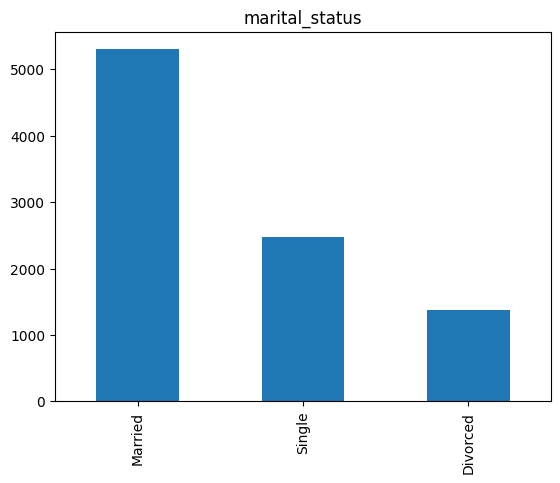

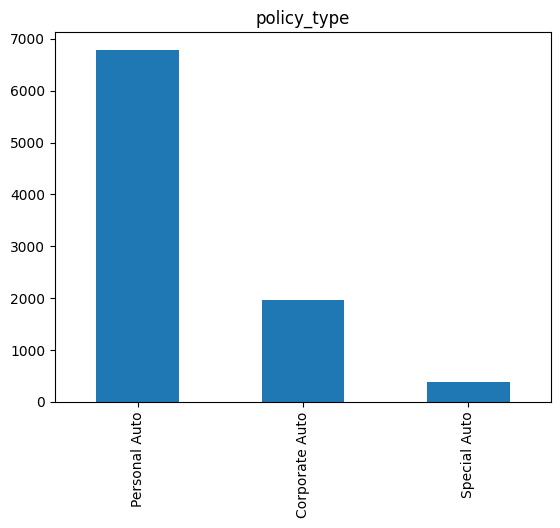

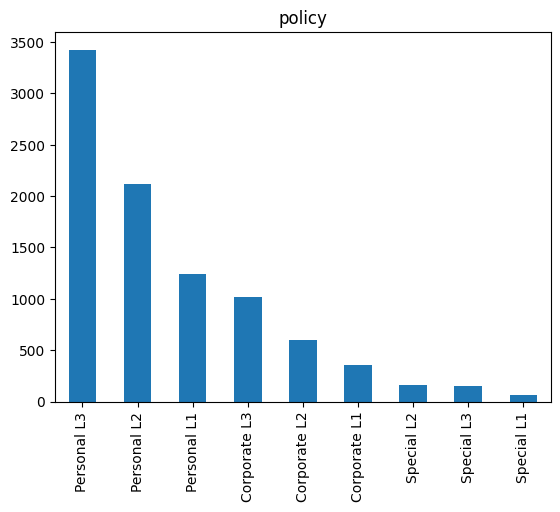

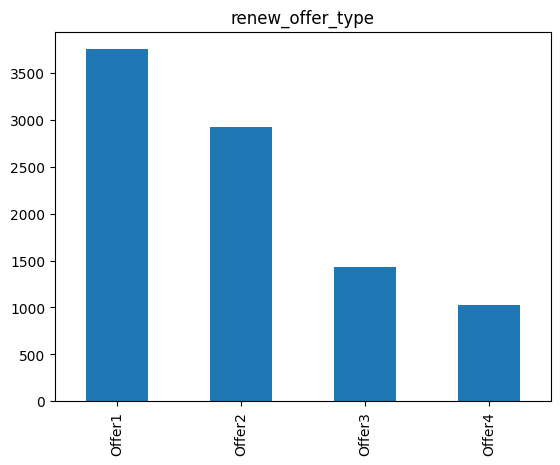

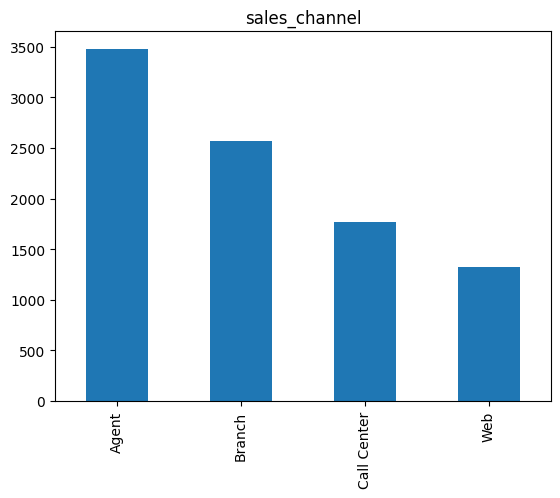

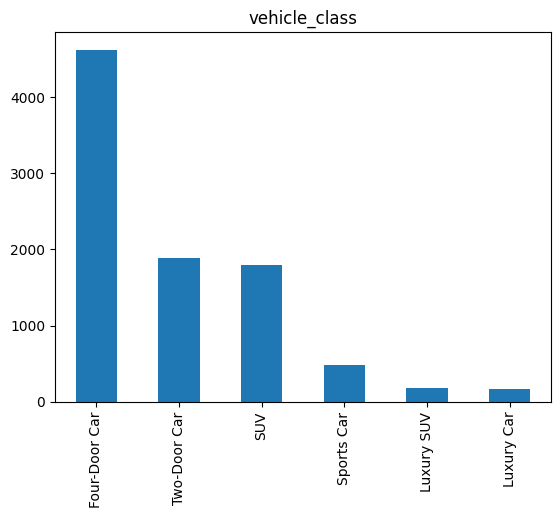

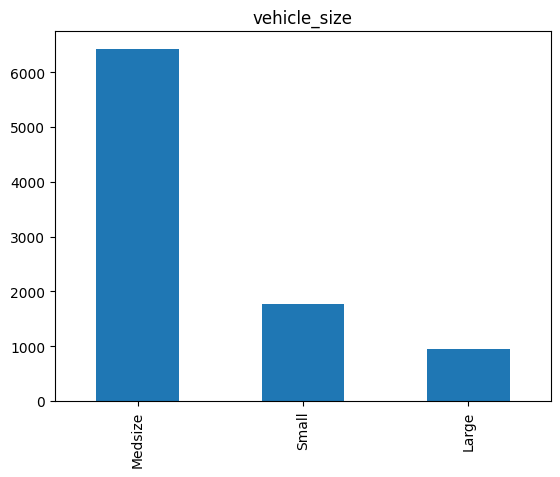

In [73]:
for x in categorical.columns.tolist():
    plt.figure()
    categorical[x].value_counts().plot(kind='bar', title=x)
    plt.show()

In [62]:
categorical.columns.tolist()

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

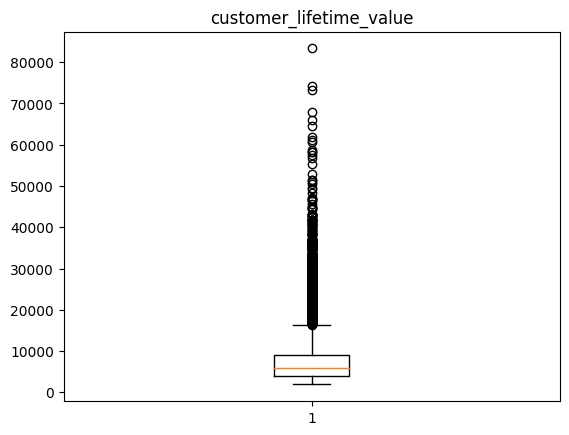

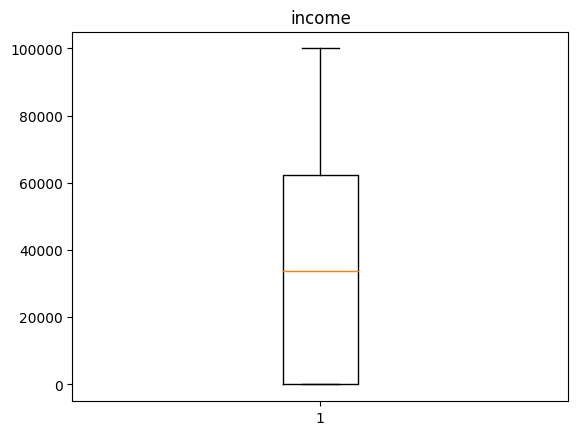

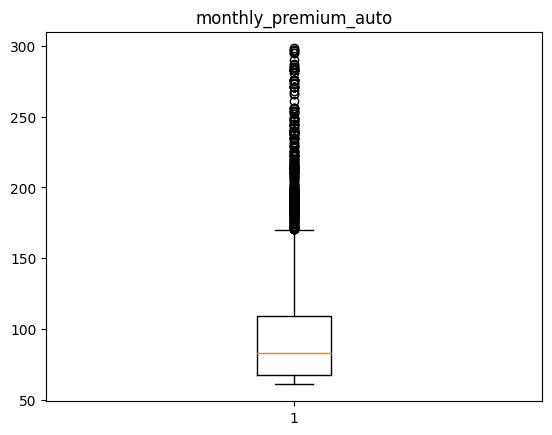

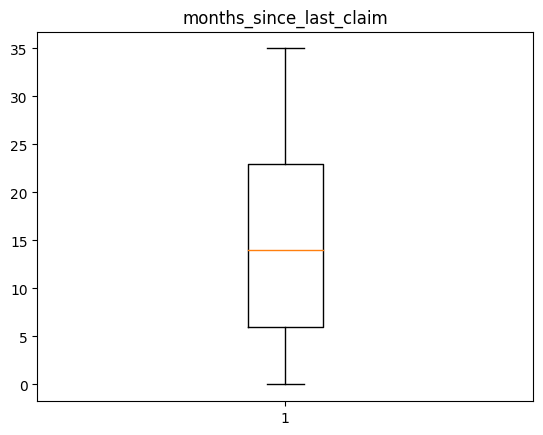

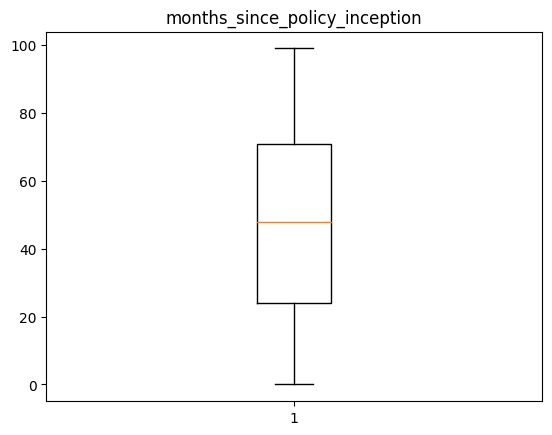

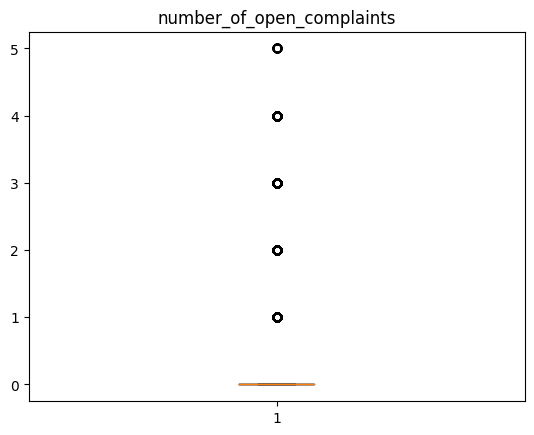

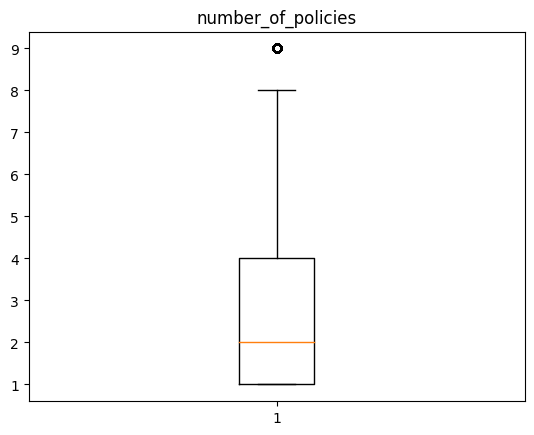

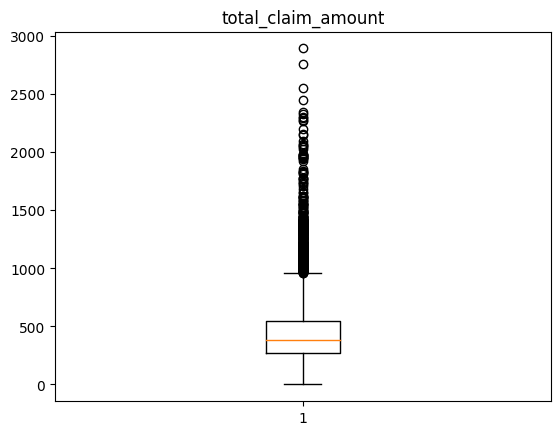

In [74]:
for x in continuous:
    plt.boxplot(customer_df[x])
    plt.title(x)
    plt.show()

In [75]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64